# Analyzing Job Opportunities for Career Recommendations

In this notebook, we will explore a comprehensive dataset of job opportunities. We will analyze various features such as job title, company rating, average salary, and sector to provide personalized job recommendations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Step 1: Load the dataset
#### Load the dataset

In [2]:
data_path = "DataEngineer.csv"
data = pd.read_csv(data_path)
data.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True


### Step 2: Data Cleaning
#### Simplify salary ranges to upper-bound numerical values

In [3]:
def extract_numeric_range(value):
    if isinstance(value, str):
        value = value.replace('$', '').replace('K', '000').replace('M', '000000').replace(',', '')
        numbers = [int(s) for s in value.split('-') if s.isdigit()]
        if len(numbers) == 2:
            return sum(numbers) / 2
        elif len(numbers) == 1:
            return numbers[0]
    return None

# Clean Salary Estimate to extract average salary
data['Average Salary'] = data['Salary Estimate'].apply(extract_numeric_range)

# Rename column for consistency
data.rename(columns={'Rating': 'Company Rating'}, inplace=True)

In [4]:
display(data.head())

,Job Title,Salary Estimate,Job Description,Company Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Average Salary
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1,80000
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1,80000
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1,80000
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1,80000
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True,80000


In [23]:
data['Revenue'].unique()

array(['$10 to $25 million (USD)', '$25 to $50 million (USD)',
       '$5 to $10 million (USD)', 'Unknown / Non-Applicable',
       '$100 to $500 million (USD)', '$2 to $5 billion (USD)',
       '$500 million to $1 billion (USD)', '$50 to $100 million (USD)',
       '$10+ billion (USD)', '$1 to $2 billion (USD)',
       '$1 to $5 million (USD)', 'Less than $1 million (USD)',
       '$5 to $10 billion (USD)', '-1'], dtype=object)

In [5]:
data['Average Salary'].nunique()

60

In [11]:
data['Average Salary'].unique()

array([ 80000,  73000,  85000,  84000,  57000, 105000,  92000,  88000,
        95000,  79000,  93000, 115000,  94000,  49000,  56000, 133000,
        67000,  53000,  81000,  43000,  62000,  55000,  69000,  54000,
        74000,  87000,  58000,  66000, 118000,  70000,  65000,  71000,
       154000,  75000,  44000,  28000,  52000,  59000,  77000, 113000,
        46000, 191000, 140000, 106000,  64000,  60000, 110000,  91000,
       164000, 108000, 100000,  99000,  82000,  27000,  39000,  45000,
        37000,  30000,  48000,  76000])

In [13]:
data['Job Title'].nunique()

1260

### Step 3: Exploratory Data Analysis (EDA)

In [38]:
# Filter the data based on the given criteria
filtered_data = data[
    (data['Average Salary'] > 100000) & 
    ((data['Company Rating'] > 4.5) & (data['Sector'] == "Information Technology"))
]

In [39]:
filtered_data.head(5)

,Job Title,Salary Estimate,Job Description,Company Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Average Salary
176,Data Engineer,$105K-$121K (Glassdoor est.),Job Description\nWe are looking for a Data Eng...,4.8,Boyle Software\n4.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Computer Hardware & Software,Information Technology,$1 to $5 million (USD),-1,-1,105000
475,Senior Database Engineer,$133K-$210K (Glassdoor est.),Your Opportunity\n\n\nDo you want to work on d...,4.6,New Relic\n4.6,"Chicago, IL","San Francisco, CA",1001 to 5000 employees,2008,Company - Public,Computer Hardware & Software,Information Technology,$100 to $500 million (USD),"AppDynamics, Datadog, Dynatrace",-1,133000
481,BHJOB15656_15057 Data Engineer,$133K-$210K (Glassdoor est.),Oour growing team at Myticas is looking for an...,5.0,Myticas Consulting\n5.0,"Chicago, IL","Ottawa, Canada",1 to 50 employees,-1,Company - Private,IT Services,Information Technology,Unknown / Non-Applicable,"Modis, excelHR, Robert Half",True,133000
972,Engineering Manager - Data OS Platform,$118K-$187K (Glassdoor est.),Your Opportunity\n\n\nThe Data OS (also known ...,4.6,New Relic\n4.6,"Phoenix, AZ","San Francisco, CA",1001 to 5000 employees,2008,Company - Public,Computer Hardware & Software,Information Technology,$100 to $500 million (USD),"AppDynamics, Datadog, Dynatrace",-1,118000
973,Data Modeler Architect,$118K-$187K (Glassdoor est.),The Data Modeler Architect is responsible for ...,5.0,Nucleusteq\n5.0,"Phoenix, AZ","Phoenix, AZ",201 to 500 employees,2018,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),-1,-1,118000


#### # Histogram of 15 Highest Average Salary grouped by Job Title

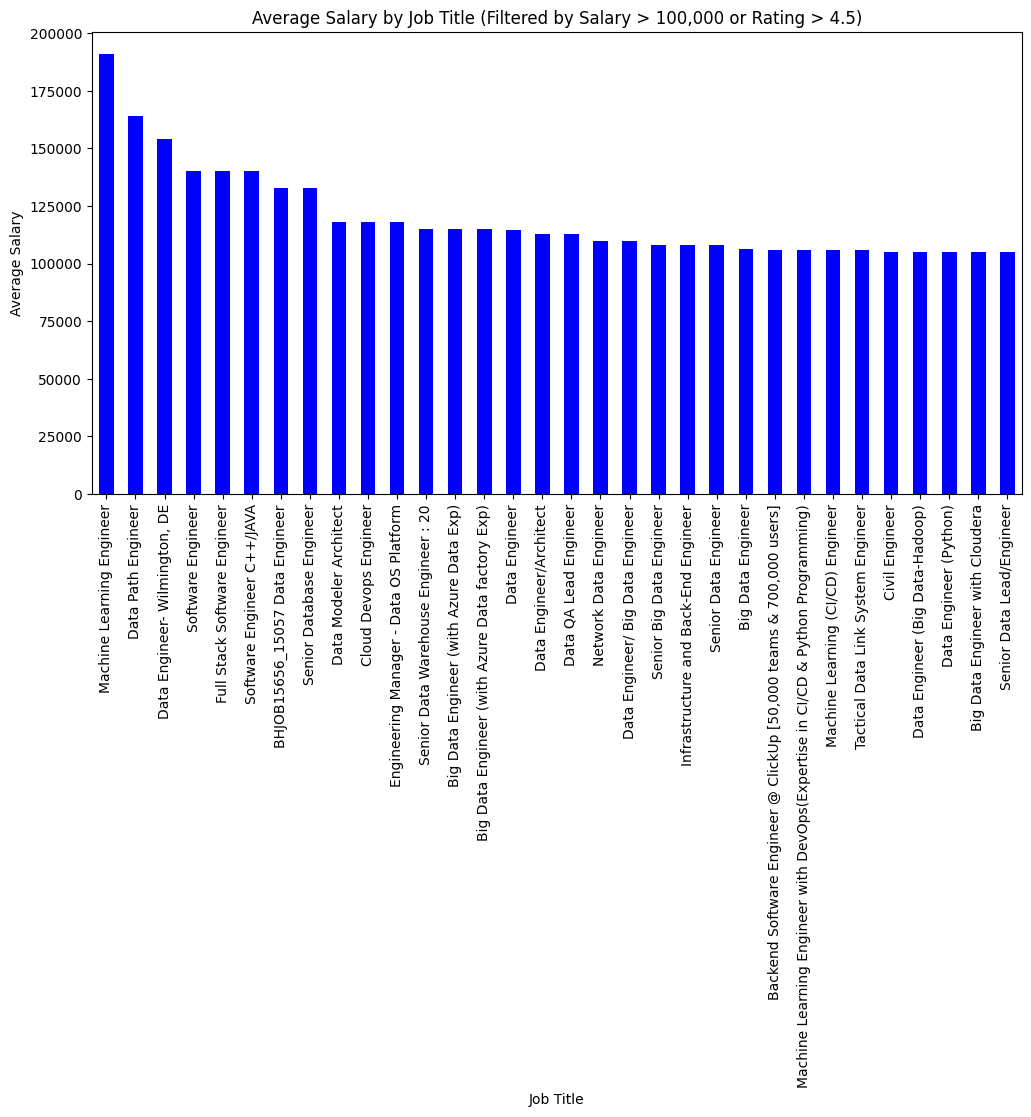

In [29]:
# Filter the data based on the updated criteria: Salary > 100,000 or Rating > 4.5
filtered_data_for_histogram = filtered_data[
    (filtered_data['Average Salary'] > 100000) & 
    (filtered_data['Company Rating'] > 4.5)
]

# Histogram of Average Salary grouped by Job Title (filtered data based on the new condition)
salary_by_job = filtered_data_for_histogram.groupby('Job Title')['Average Salary'].mean().sort_values(ascending=False)

# Filter jobs with salary above 100,000 or rating above 4.5
plt.figure(figsize=(12, 6))
salary_by_job.plot(kind='bar', color='blue')
plt.title('Average Salary by Job Title (Filtered by Salary > 100,000 or Rating > 4.5)')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.show()


#### Pie Chart Best Job ditribution by IT Sector

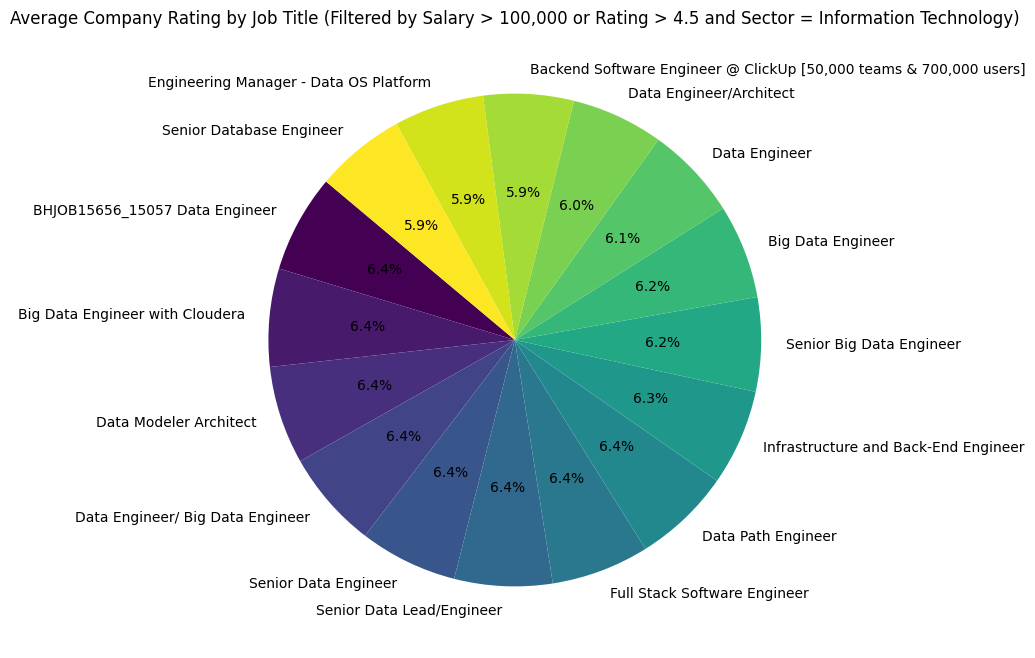

In [31]:
# Filter the data based on the given criteria for pie chart (Salary > 100,000 or Rating > 4.5 and Sector = 'Information Technology')
filtered_data_for_pie = filtered_data[
    ((filtered_data['Average Salary'] > 100000) & (filtered_data['Company Rating'] > 4.5)) &
    (filtered_data['Sector'] == 'Information Technology')
]

# Pie chart of Company Ratings grouped by Job Title (filtered data based on the new condition)
rating_by_job = filtered_data_for_pie.groupby('Job Title')['Company Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
rating_by_job.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='viridis')
plt.title('Average Company Rating by Job Title (Filtered by Salary > 100,000 or Rating > 4.5 and Sector = Information Technology)')
plt.ylabel('')  # Hide y-label for better presentation
plt.show()


In [37]:
def recommend_jobs(min_salary=0, min_rating=0, sector=None):
    # Filter the dataset based on the given conditions
    filtered_jobs = data[(data['Average Salary'] >= min_salary) & (data['Company Rating'] >= min_rating)]
    
    # If a sector is provided, filter by sector
    if sector:
        filtered_jobs = filtered_jobs[filtered_jobs['Sector'] == sector]
    
    # Sort the filtered jobs by Company Rating and Average Salary in descending order
    sorted_jobs = filtered_jobs.sort_values(by=['Company Rating', 'Average Salary'], ascending=[False, False])
    
    # Return top 10 jobs with the selected columns
    return sorted_jobs[['Job Title', 'Average Salary', 'Company Rating', 'Sector']].head(10)

# Example usage:
print("Recommended Jobs: Information Technology with salary > 100000 and rating > 4.5")
display(recommend_jobs(min_salary=100000, min_rating=4.5, sector='Information Technology'))


Recommended Jobs: Information Technology with salary > 100000 and rating > 4.5


,Job Title,Average Salary,Company Rating,Sector
1830,Data Path Engineer,164000,5.0,Information Technology
1557,Full Stack Software Engineer,140000,5.0,Information Technology
481,BHJOB15656_15057 Data Engineer,133000,5.0,Information Technology
973,Data Modeler Architect,118000,5.0,Information Technology
1770,Data Engineer/ Big Data Engineer,110000,5.0,Information Technology
1964,Senior Data Engineer,108000,5.0,Information Technology
1679,Big Data Engineer with Cloudera,105000,5.0,Information Technology
1687,Senior Data Lead/Engineer,105000,5.0,Information Technology
1866,Data Engineer,108000,4.9,Information Technology
1963,Infrastructure and Back-End Engineer,108000,4.9,Information Technology


In [40]:
def recommend_jobs(sector=None, min_salary=0, min_rating=0):
    # Filter the dataset based on the provided conditions
    filtered_jobs = data[(data['Average Salary'] >= min_salary) & (data['Company Rating'] >= min_rating)]
    
    # If a sector is provided, filter by sector
    if sector:
        filtered_jobs = filtered_jobs[filtered_jobs['Sector'].str.contains(sector, case=False)]
    
    # Sort the filtered jobs by Average Salary and Company Rating in descending order
    sorted_jobs = filtered_jobs.sort_values(by=['Company Rating', 'Average Salary'], ascending=[False, False])
    
    # Return top 10 jobs with selected columns
    return sorted_jobs[['Job Title', 'Company Name', 'Sector', 'Founded', 'Location']].head(3)

# Example usage:
print("Recommended Jobs: Information Technology with salary > 100000 and rating > 4.5")
display(recommend_jobs(sector='Information Technology', min_salary=100000, min_rating=4.5))


Recommended Jobs: Information Technology with salary > 100000 and rating > 4.5


,Job Title,Company Name,Sector,Founded,Location
1830,Data Path Engineer,Clumio\n5.0,Information Technology,2017,"Santa Clara, CA"
1557,Full Stack Software Engineer,MediKeeper\n5.0,Information Technology,-1,"San Diego, CA"
481,BHJOB15656_15057 Data Engineer,Myticas Consulting\n5.0,Information Technology,-1,"Chicago, IL"


## Conclusion

In this notebook, I explored a dataset of job opportunities and provided insights into various features such as **average salary**, **company rating**, and **sector**. Users can utilize the recommendation function to find jobs that match their salary and rating preferences, as well as specific sectors. Feel free to modify this notebook to explore different aspects of the dataset!